In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
Station.

SyntaxError: invalid syntax (<ipython-input-9-e8f7ba630b17>, line 1)

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()


In [11]:
session.query(Measurement.date,Measurement.id,Measurement.prcp).filter(Measurement.id<25).all()

[('2010-01-01', 1, 0.08),
 ('2010-01-02', 2, 0.0),
 ('2010-01-03', 3, 0.0),
 ('2010-01-04', 4, 0.0),
 ('2010-01-06', 5, None),
 ('2010-01-07', 6, 0.06),
 ('2010-01-08', 7, 0.0),
 ('2010-01-09', 8, 0.0),
 ('2010-01-10', 9, 0.0),
 ('2010-01-11', 10, 0.01),
 ('2010-01-12', 11, 0.0),
 ('2010-01-14', 12, 0.0),
 ('2010-01-15', 13, 0.0),
 ('2010-01-16', 14, 0.0),
 ('2010-01-17', 15, 0.0),
 ('2010-01-18', 16, 0.0),
 ('2010-01-19', 17, 0.0),
 ('2010-01-20', 18, 0.0),
 ('2010-01-21', 19, 0.0),
 ('2010-01-22', 20, 0.0),
 ('2010-01-23', 21, 0.0),
 ('2010-01-24', 22, 0.01),
 ('2010-01-25', 23, 0.0),
 ('2010-01-26', 24, 0.04)]

# Exploratory Climate Analysis

In [12]:
stations=("Resources/hawaii_stations.csv")
weather=("Resources/hawaii_measurements.csv")
stations_data=pd.read_csv(stations,encoding="iso-8859-1")
weather_data=pd.read_csv(weather,encoding="iso-8859-1")
stations_df=pd.DataFrame(stations_data)
weather_df=pd.DataFrame(weather_data)


In [13]:
weather_df.count()

station    19550
date       19550
prcp       18103
tobs       19550
dtype: int64

In [14]:
weather_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [15]:
stations_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [18]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [19]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [20]:
automap_base

<function sqlalchemy.ext.automap.automap_base>

In [21]:
session.query(func.max(Measurement.date)).first()

('2017-08-23')

In [22]:
results1_pd = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>"2016-08-24").all()

In [23]:
results1_df = pd.DataFrame(results1_pd)
results1_df.head()

,date,prcp
0,2016-08-25,0.08
1,2016-08-26,0.00
2,2016-08-27,0.00
3,2016-08-28,0.01
4,2016-08-29,0.00


In [24]:
results1_df.set_index('date').head()

,prcp
date,
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00


In [25]:
results2_df = results1_df.sort_values("date", ascending=True)
results2_df.head()


,date,prcp
0,2016-08-25,0.08
1003,2016-08-25,0.00
1519,2016-08-25,0.06
700,2016-08-25,0.00
359,2016-08-25,0.08


In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


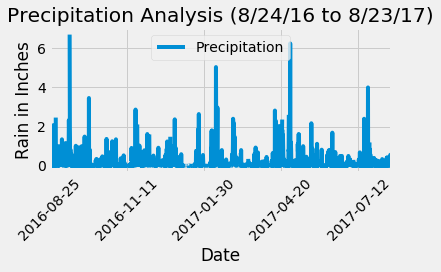

In [26]:
results2_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [197]:
results2_df.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [198]:
from sqlalchemy import desc

In [199]:
# Design a query to show how many stations are available in this dataset?
session.query((Measurement.station)).group_by(Measurement.station).count()

9

In [123]:
Station.

In [202]:
actv_station = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(desc(func.count(Measurement.date))).statement

In [203]:
actv_station

<sqlalchemy.sql.annotation.AnnotatedSelect at 0x119957668; AnnotatedSelect object>

In [204]:
dfActive = pd.read_sql_query(actv_station, session.bind)
dfActive


,station,count_1
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [205]:
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(desc(func.count(Measurement.date))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
func.min, func.max, func.avg
Measurement.

In [206]:

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [207]:
tempanalysis_pd = session.query(Measurement.tobs, func.count(Measurement.date)).filter(Measurement.date>"2016-08-23", Measurement.station=="USC00519281").group_by(Measurement.date).statement
tempanalysis_pd

<sqlalchemy.sql.annotation.AnnotatedSelect at 0x119a7d0b8; AnnotatedSelect object>

In [208]:
tempdf = pd.read_sql_query(tempanalysis_pd, session.bind)
tempdf

,tobs,count_1
0,77.0,1
1,80.0,1
2,80.0,1
3,75.0,1
4,73.0,1
5,78.0,1
6,77.0,1
7,78.0,1
8,80.0,1
9,80.0,1


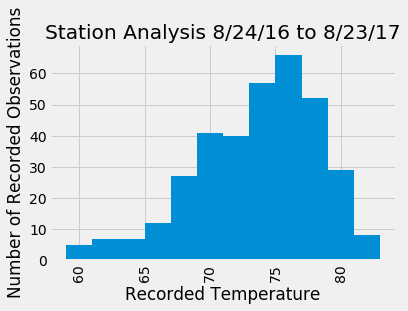

In [209]:
tempdf.hist('tobs', 'count_1', bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis 8/24/16 to 8/23/17")
plt.show()

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [210]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [211]:
def calc_temps(start_date, end_date):
    
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [30]:
start_date = '2017-02-28'
end_date = '2017-03-05'

    
    
calc_temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).statement

trip_temp = pd.read_sql_query(calc_temps, session.bind)
trip_temp

,min_1,avg_1,max_1
0,64.0,72.027778,78.0


Text(0,0.5,'Temp (F)')

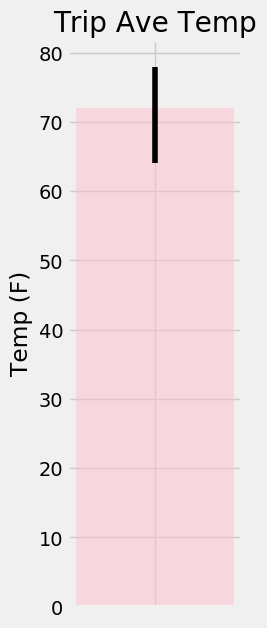

In [31]:

x=np.arange(1,2)
width=0.1
fig = plt.figure(figsize=(2,7), dpi=100)
plt.bar(x,trip_temp['avg_1'],width,linewidth=7, alpha=0.5, tick_label="", 
        color="pink",yerr=(trip_temp['avg_1']-trip_temp['min_1'], trip_temp['max_1']-trip_temp['avg_1']))
plt.title("Trip Ave Temp")
plt.ylabel("Temp (F)")

<IPython.core.display.Javascript object>


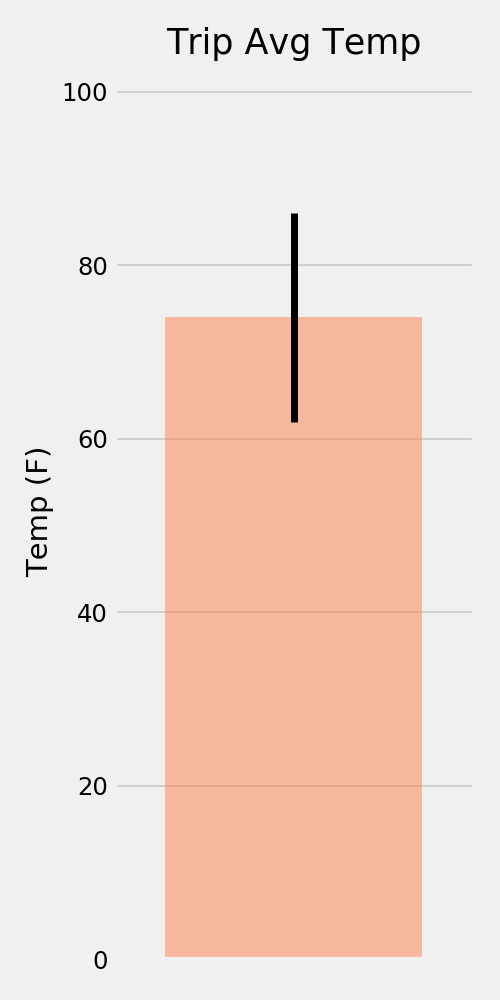

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [33]:
start_date = '2017-02-28'
end_date = '2017-03-05'

session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.0),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.0),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.0),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.19),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.19),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.

In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-07")

[(57.0, 68.54385964912281, 76.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


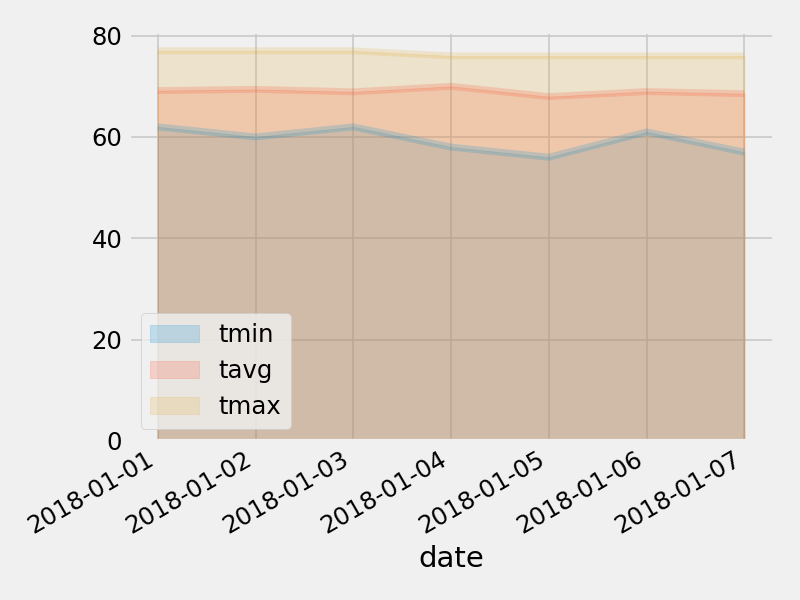

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


In [61]:
import datetime as dt
import numpy as np



import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify


In [62]:
app = Flask(__name__)

In [63]:


    
BegYear = dt.datetime(2016,8,23) 
EndYear = dt.datetime(2017,8,24) 

@app.route("/api/v1.0/precipitation")
def Precip():

    
    results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > BegYear).filter(Measurement.date < EndYear).all()
     
    
    date_n_prcp = []
    for result in results:
        prcp_dict = {}
        prcp_dict["date"] = result.date
        prcp_dict["prcp"] = result.prcp

        date_n_prcp.append(prcp_dict)

    return jsonify(date_n_prcp)
    
    
    
    
    
    
    
    
if __name__ == "__main__":
    app.run(debug=True)

OSError: [Errno 48] Address already in use

In [64]:
#@app.route("/api/v1.0/stations")
@app.route("/api/v1.0/stations")
stat_app = session.query(Station.station).statement
    
Sts = pd.read_sql_query(stat_app, session.bind)
#Sts.set_index('station',inplace=True)
    
    # turn df to dict
df2_as_json = Sts.to_dict(orient='split')
    #Return the json representation of your dictionary.
return jsonify({'status': 'ok', 'json_data': df2_as_json})

SyntaxError: invalid syntax (<ipython-input-64-d812d7c80a78>, line 3)

In [65]:
@app.route("/api/v1.0/stations")
def sts():

    
    results = session.query(Measurement.station).all()
     
    
    stat = []
    for result in results:
        stat_dict = {}
        stat_dict["station"] = result.station
        

        stat.append(stat_dict)

    return jsonify(date_n_prcp)
    

if __name__ == "__main__":
    app.run(debug=True)

OSError: [Errno 48] Address already in use

In [53]:

BegYear = dt.datetime(2016,8,23) 
EndYear = dt.datetime(2017,8,24) 

@app.route("/api/v1.0/tobs")
def Temp():

    
    results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > BegYear).filter(Measurement.date < EndYear).all()
     
    
    date_n_tobs = []
    for result in results:
        prcp_dict = {}
        prcp_dict["date"] = result.date
        prcp_dict["tobs"] = result.tobs

        date_n_prcp.append(prcp_dict)

    return jsonify(date_n_tobs)
    
    
    
    
    
    
    
    
if __name__ == "__main__":
    app.run(debug=True)

OSError: [Errno 48] Address already in use

In [70]:
def daily_normals(vac_days):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    start_date = '2017-02-28'
    end_date = '2017-03-05'
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)].\
    filter(Measurement.date > start_date).filter(Measurement.date < end_date).statement
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
    temps = []
    for result in results:
        prcp_dict = {}
        prcp_dict["date"] = result.date
        prcp_dict["tobs"] = result.tobs

        date_n_prcp.append(prcp_dict)

    return jsonify(date_n_tobs)
    
#daily_normals("01-07")
if __name__ == "__main__":
    app.run(debug=True)